# 互评作业1 数据探索性分析与数据预处理
数据集为Wine Reviews，包含2个csv文件

In [1]:
import pandas as pd
import numpy as np
import csv
import json
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# · 针对winemag-data-130k-v2.csv数据集分析

需要统计的13个属性如下：
- country：产出国

- description：描述

- designation：葡萄酒名称

- points：度数

- price：价格

- province：产出省

- region_1：产出区域1

- region_2：产出区域2

- taster_name：品鉴师

- taster_twitter_handle：品鉴师推特号

- title：品鉴师所获荣誉

- variety：品种

- winery：酒厂

## 1. 提取和整理数据

In [2]:
# 导入数据
wine_data = pd.read_csv('wine\winemag-data-130k-v2.csv',index_col = 0)
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
cols = list(wine_data)
cols,wine_data.shape

(['country',
  'description',
  'designation',
  'points',
  'price',
  'province',
  'region_1',
  'region_2',
  'taster_name',
  'taster_twitter_handle',
  'title',
  'variety',
  'winery'],
 (129971, 13))

## 2. 数据摘要
### 2.1 计算标称数据频数


In [4]:
# 查看各列值的属性
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


**country,designation,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery为标称属性，统计频数如下**

In [5]:
col_name = ['country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','variety','winery']
for name in col_name:
    print(wine_data[name].value_counts())
    print('-'*60)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

**California州为最大产出州，Roger Voss的品鉴次数最多，Pinot Noir品种统计最多。**
### 2.2 对数值数据计算五数概括
数值数据为points和price

In [6]:
name = ['points','price']
wine_data[name].describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000



- points中最大100.0，最小80.0，均值88.45
- prive中最大3300.0，最小4.0，均值35.36


## 3. 数据可视化
### 3.1 度数分析

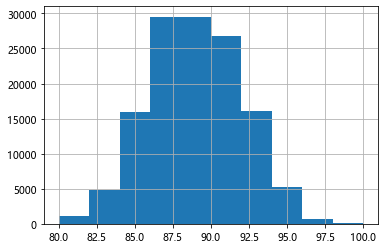

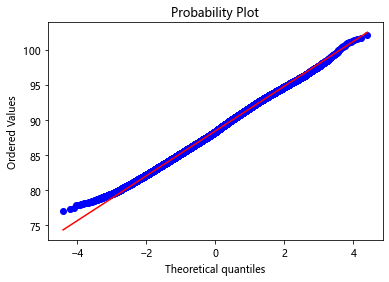

<AxesSubplot:>

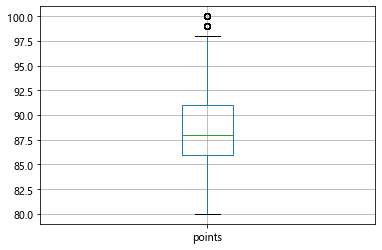

In [7]:
# 度数可视化
wine_data['points'].hist()
points = wine_data['points'].dropna()
points = points.apply(lambda x: x + np.random.normal())
fig = plt.figure()
res = stats.probplot(points, plot=plt)
plt.show()

wine_data.boxplot(column=['points'])


**经检验，度数属性符合正态分布。97度以上的值出现极少。**

### 3.2 价格可视化

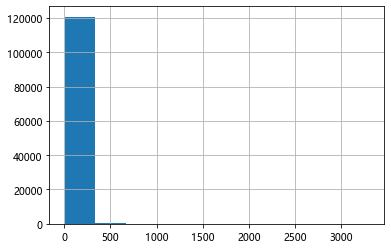

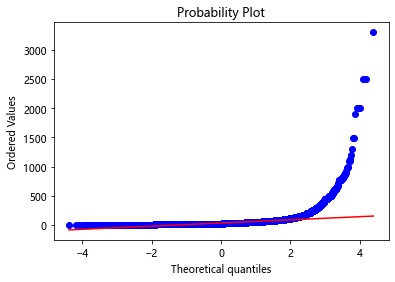

<AxesSubplot:>

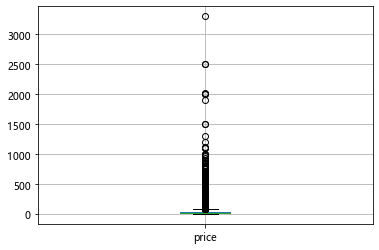

In [8]:
# 价格可视化
wine_data['price'].hist()

price = wine_data['price'].dropna()
price = price.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()
wine_data.boxplot(column=['price'])

**价格属性中，高价位出现次数较少，1000以下较为集中**

### 3.3 酒厂名可视化

<AxesSubplot:title={'center':'winery'}, xlabel='name', ylabel='count'>

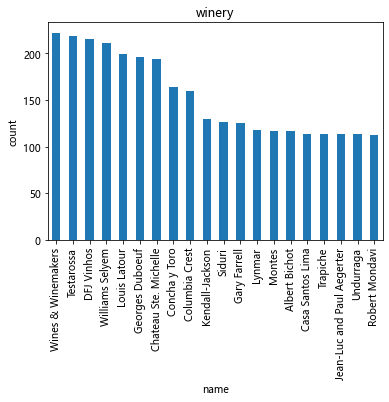

In [9]:
wine_data['winery'].value_counts().head(20).plot.bar(title='winery',xlabel='name',ylabel='count')

**经统计品种数量排名前20的数据中，Wines & Winemakers占比最多**

## 4. 缺失值处理
### 4.1 剔除缺失值


In [10]:
# 统计缺失值个数
wine_data.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

- country和province缺失个数相同，可能无法确定酒的产出地区
- taster_twitter_handle缺失，可能是因为该taster无相关荣誉

**variety属性缺失一个，查看该记录，发现其可能是没有经过品鉴的新酒，删除后影响较小，直接剔除该记录**

In [11]:
cwine_data = wine_data.copy(deep=True)

In [12]:
cwine_data[cwine_data.variety.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [13]:
cwine_data = cwine_data.dropna(how='any',subset=['variety'])

In [14]:
cwine_data.isnull().sum()

country                     63
description                  0
designation              37464
points                       0
price                     8996
province                    63
region_1                 21246
region_2                 79459
taster_name              26243
taster_twitter_handle    31212
title                        0
variety                      0
winery                       0
dtype: int64

### 4.2 高频率值填补缺失值
**在上述分析中，未缺失数据的价格大多集中在1000元以下，因此选择用最高频率值填补价格缺失值**

In [15]:
fill_data = cwine_data.fillna({'price':cwine_data['price'].mode().item()})

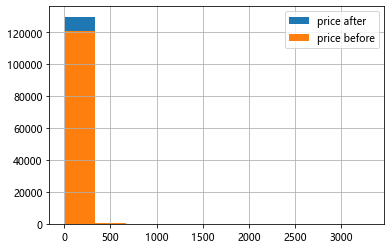

In [16]:
fill_data['price'].hist(label='price after'),cwine_data['price'].hist(label='price before')
plt.legend(loc='upper right')

**可以看出，处理后的高频值更多。**


### 4.3 通过数据相似性填充缺失值

**针对region 1，用省份和葡萄种类相同的值填充，没有相同的则用统一省份最高频的region 1填充。最后未找到的使用该国最高频region 1 填充。**

In [17]:
#  由于之前删除数据，首先重置索引
cwine_data.reset_index(inplace=True,drop=True)

# 选择region_1 为空的元组
region_null = cwine_data[cwine_data.region_1.isnull()][['province','variety','country']]


In [18]:
# 相似值填充
region = ''
ConProvDict={}
for row in region_null.itertuples():
    # 初始化
    if len(ConProvDict) ==0:
        simTuple = cwine_data[(cwine_data.province==row[1])& (cwine_data.variety==row[2]) & ~(cwine_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            simTuple = cwine_data[(cwine_data.province==row[1])& ~(cwine_data.region_1.isnull())]['region_1']
        
        # 使用该国region_1最高频值填充
        if len(simTuple) ==0:
            simTuple = cwine_data[(cwine_data.country==row[3])& ~(cwine_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            region = ''
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
        else:
            region = simTuple.value_counts().keys()[0]
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
            cwine_data.loc[row[0]:row[0]+1,'region_1']= region   
    if ConProvDict.get(row[1])!=None and ConProvDict[row[1]].get(row[2])!=None:
        region = ConProvDict[row[1]][row[2]]
        if region !='':
             cwine_data.loc[row[0]:row[0]+1,'region_1']= region
    else:
        simTuple = cwine_data[(cwine_data.province==row[1])& (cwine_data.variety==row[2]) & ~(cwine_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            simTuple = cwine_data[(cwine_data.province==row[1])& ~(cwine_data.region_1.isnull())]['region_1']
        # 对于找不到相似元组的数据，使用该国region_1最高频填充
        if len(simTuple) ==0:
            simTuple = cwine_data[(cwine_data.country==row[3])& ~(cwine_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            region = ''
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
        else:
            region = simTuple.value_counts().keys()[0]
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
            cwine_data.loc[row[0]:row[0]+1,'region_1']= region

In [19]:
cwine_data['region_1'].isnull().sum()

827

In [20]:
c = cwine_data['region_1'].value_counts().head(10).to_frame()
d = wine_data['region_1'].value_counts().head(10).to_frame()

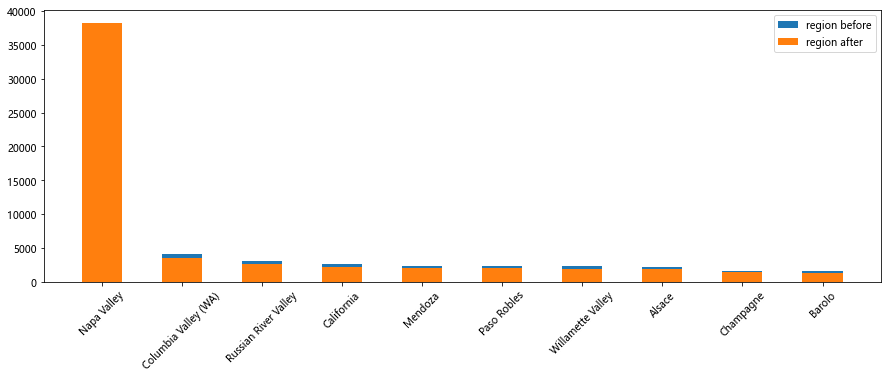

In [21]:
plt.figure(figsize=(15,5))
index = np.arange(10)
count = np.zeros(10)
plt.bar(index,d['region_1'][:],0.5,label='region before')
plt.xticks(index,d['region_1'].keys(),rotation=45)


plt.bar(index,c['region_1'][:],0.5,label='region after')
plt.xticks(index,c['region_1'].keys(),rotation=45)
plt.legend(loc='upper right')

**处理后仍有828个值无法填充，观察到部分记录的country为空，这些记录将无法找到相应值填充**
**处理后大部分填充了Napa Vallery值，前10的排名有所变化**

### 4.4 通过属性相关性填充缺失值

In [22]:
# 计算相关系数
print(cwine_data.corr())

          points     price
points  1.000000  0.416167
price   0.416167  1.000000


**通过线性拟合用points与price的相关性填补price缺失值**

In [23]:
# 找出price空的point
pointx =  cwine_data[cwine_data.price.isnull()]['points']
# points = cwine_data['points']
# price = cwine_data['price']
test = cwine_data.dropna(how='any',subset=['price'])
model = sm.OLS(test['price'],test['points']).fit()
price_pred = model.predict(pointx)

for i in price_pred.keys():
    cwine_data.loc[i-1,'price'] = price_pred[i]
# for i in range(len(new_data)):
#     if(np.isnan(new_data['price'][i])):
#         new_data.loc[i,'price'] = model.predict(new_data['points'][i])
# number_data = ['points','price']


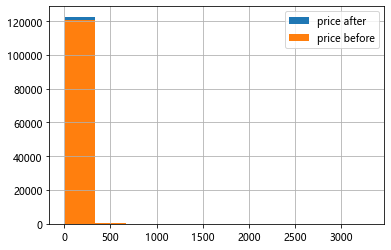

In [24]:
cwine_data.price.hist(label='price after')
wine_data.price.hist(label='price before')
plt.legend(loc='upper right')

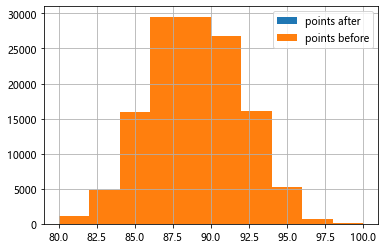

In [25]:
cwine_data.points.hist(label='points after')
wine_data.points.hist(label='points before')
plt.legend(loc='upper right')

In [26]:
cwine_data.price.describe()

count    122897.000000
mean         35.402163
std          39.324337
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

In [27]:
wine_data.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

<AxesSubplot:>

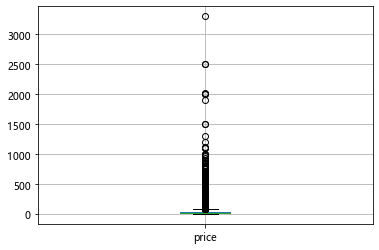

In [28]:
wine_data.boxplot(column='price')


<AxesSubplot:>

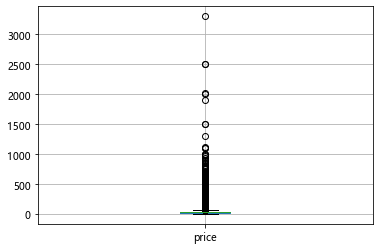

In [29]:
cwine_data.boxplot(column='price')

**填充后points变化不明显。price均值和标准差均变化，均值减小。**

## 5. 可视化比较清洗前后数据集
- 首先删除variety为空的一行对齐前后数据集

In [30]:
wine_data = wine_data.dropna(how='any',subset=['variety'])

In [31]:
cwine_data.isnull().sum()

country                     64
description                  1
designation              37465
points                       1
price                     7074
province                    64
region_1                   828
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        1
variety                      1
winery                       1
dtype: int64

In [32]:
wine_data.shape,cwine_data.shape

((129970, 13), (129971, 13))

In [33]:
# 对price做对比
price = wine_data['price'].value_counts().head(390)
cprice = cwine_data['price'].value_counts().head(390)
# len(price),len(cprice)
pltdf = pd.DataFrame({'price':cprice.values,'price_old':price.values})

<AxesSubplot:>

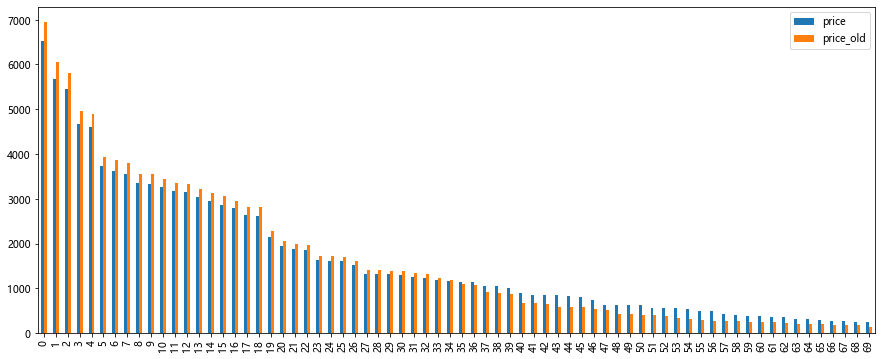

In [34]:
plt.rcParams['figure.figsize']=(15,6)
pltdf.sort_index().head(70).plot.bar()

**在频率较高的价格区间内前后变化不大，在频率较低的价格区间内有些值的出现次数增加明显**




# · 针对winemag-data_first150k.csv数据集分析

该数据集比上一个数据集缺少了3个属性，需要统计的10个属性如下：
- country：产出国

- description：描述

- designation：葡萄酒名称

- points：度数

- price：价格

- province：产出省

- region_1：产出区域1

- region_2：产出区域2

- variety：品种

- winery：酒厂

## 1. 提取和整理数据

In [35]:
# 导入数据
wine1_data = pd.read_csv('wine\winemag-data_first150k.csv',index_col = 0)
wine1_data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [36]:
cols = list(wine1_data)
cols,wine1_data.shape

(['country',
  'description',
  'designation',
  'points',
  'price',
  'province',
  'region_1',
  'region_2',
  'variety',
  'winery'],
 (150930, 10))

## 2. 数据摘要
### 2.1 计算标称数据频数


In [37]:
# 查看各列值的属性
wine1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


**country,designation,province,region_1,region_2,variety,winery为标称属性，统计频数如下**

In [38]:
col_name = ['country','designation','province','region_1','region_2','variety','winery']
for name in col_name:
    print(wine1_data[name].value_counts())
    print('-'*60)

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

**US位最大产出国，California为最大产出州，Chardonnay品种出现次数最多，williams Selyem酒厂出现次数最多**
### 2.2 对数值数据计算五数概括
数值数据为points和price

In [39]:
name = ['points','price']
wine1_data[name].describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000



- points中最大100.0，最小80.0，均值87.88
- price中最大2300.0，最小4.0，均值33.13


## 3. 数据可视化
### 3.1 度数分析

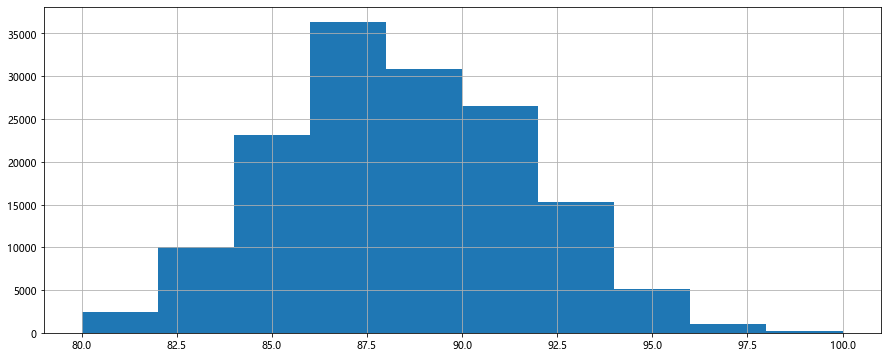

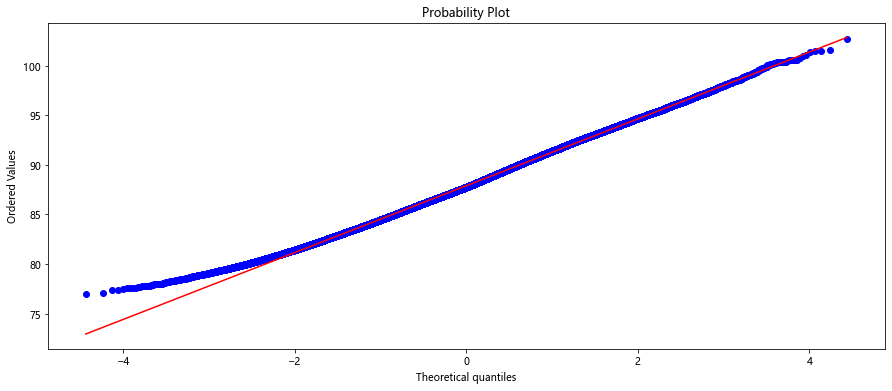

<AxesSubplot:>

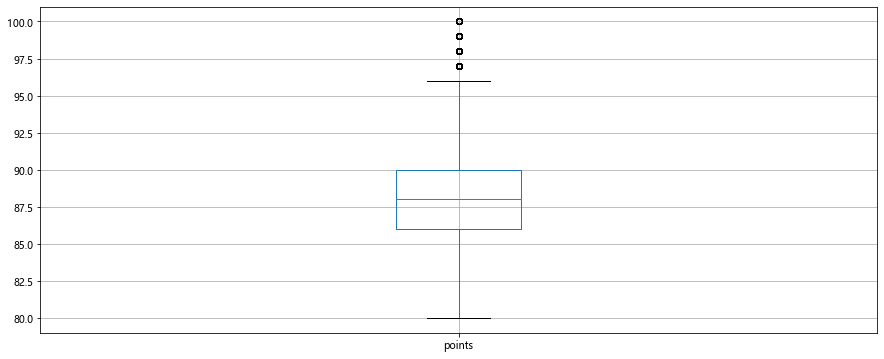

In [40]:
# 度数可视化
wine1_data['points'].hist()
points = wine1_data['points'].dropna()
points = points.apply(lambda x: x + np.random.normal())
fig = plt.figure()
res = stats.probplot(points, plot=plt)
plt.show()

wine1_data.boxplot(column=['points'])


**经检验，度数属性符合整体分布，97.5以上极少出现**

### 3.2 价格可视化

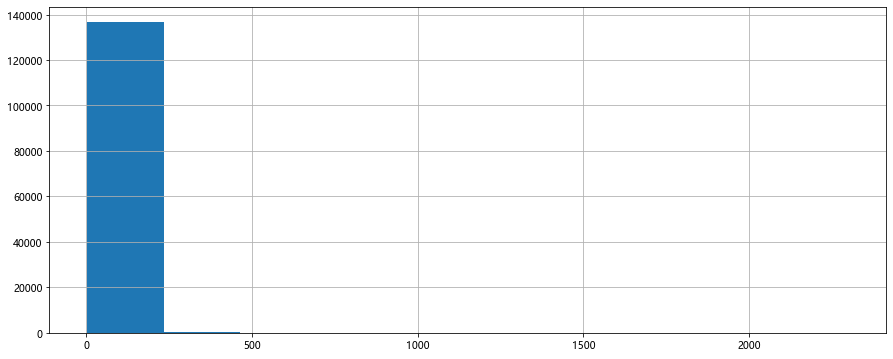

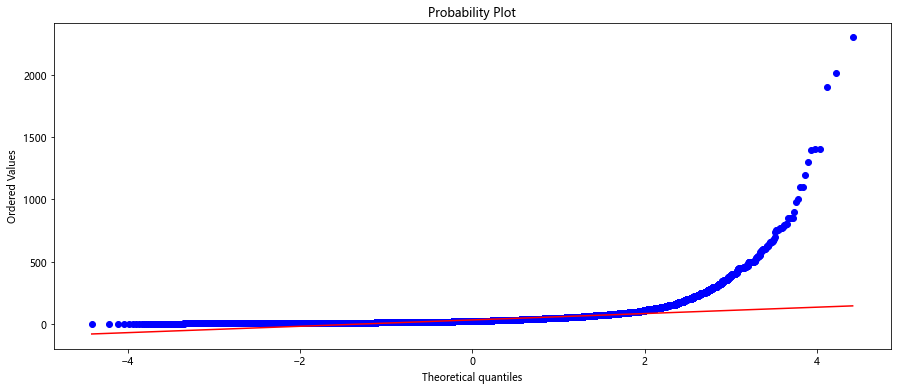

<AxesSubplot:>

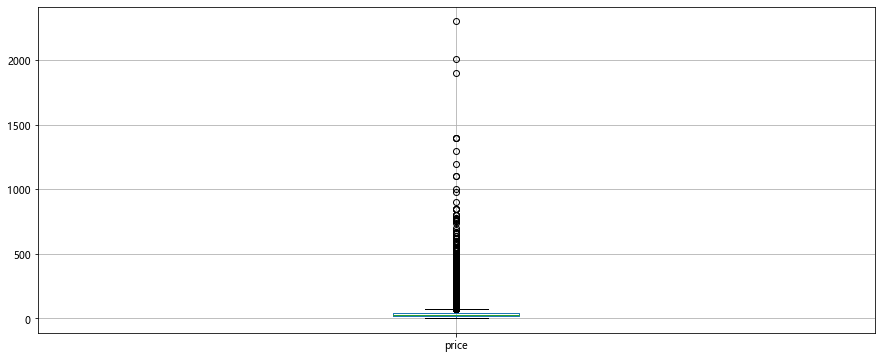

In [41]:
# 价格可视化
wine1_data['price'].hist()

price = wine1_data['price'].dropna()
price = price.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()
wine1_data.boxplot(column=['price'])

**价格属性中，高价位出现次数较少，1000以下较为集中**

### 3.3 酒厂名可视化

<AxesSubplot:title={'center':'winery'}, xlabel='name', ylabel='count'>

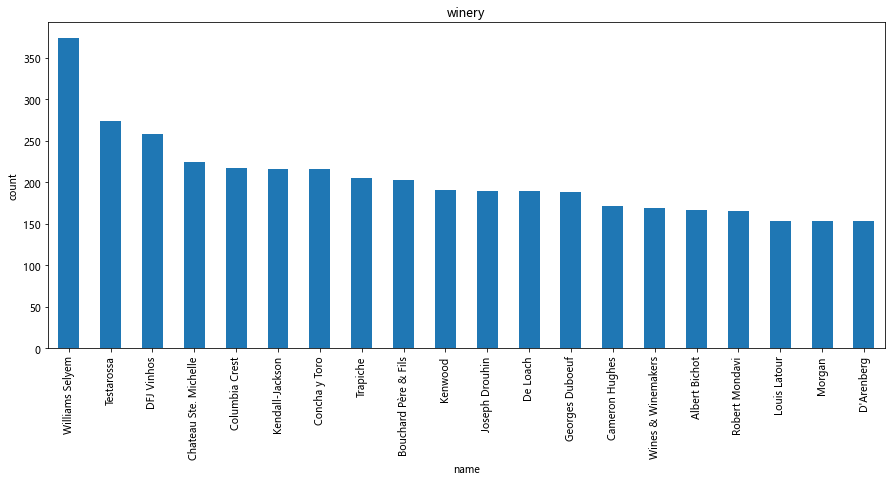

In [42]:
wine1_data['winery'].value_counts().head(20).plot.bar(title='winery',xlabel='name',ylabel='count')

**经统计品种数量排名前20的数据中，Wines & Winemakers占比最多**

## 4. 缺失值处理
### 4.1 剔除缺失值


In [43]:
# 统计缺失值个数
wine1_data.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

**country和province缺失值个数相同，且占比较少，考虑直接删除为空的记录**


In [44]:
# 剔除空值元组
cwine1_data = wine1_data.copy(deep=True) 

In [45]:
cwine1_data = cwine1_data.dropna(how="any", subset=["country"])

In [46]:
cwine1_data.isnull().sum()

country            0
description        0
designation    45735
points             0
price          13695
province           0
region_1       25055
region_2       89972
variety            0
winery             0
dtype: int64

In [47]:
wine1_data.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

### 4.2 高频率值填补缺失值
**酒名用高频值填充**

In [48]:
cwine1_data.designation.value_counts()

Reserve                             2752
Reserva                             1810
Estate                              1571
Barrel sample                       1326
Riserva                              754
                                    ... 
Petra                                  1
Capitel del Monte                      1
Sunny View Vineyard                    1
Erbach Ortslage Kabinett Trocken       1
Seeberg Reserve                        1
Name: designation, Length: 30618, dtype: int64

In [49]:
cwine1_data['designation'].fillna(cwine1_data.designation.value_counts().head(1).keys()[0]
,inplace=True)

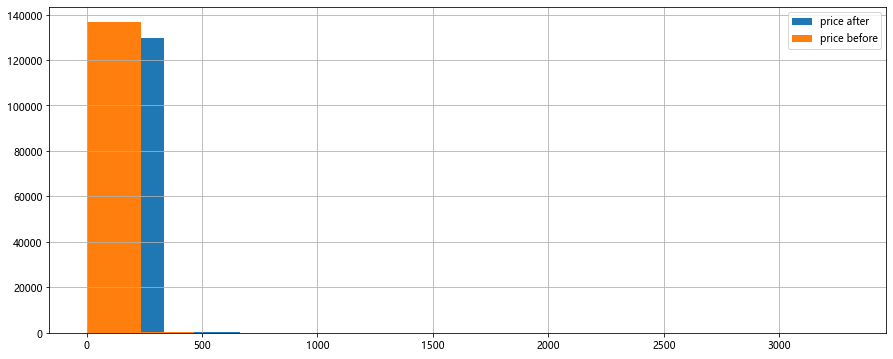

In [50]:
fill_data['price'].hist(label='price after'),cwine1_data['price'].hist(label='price before')
plt.legend(loc='upper right')

**对比看出，高频值较之前有提升**


### 4.3 通过数据相似性填充缺失值

**针对region 1，用省份和葡萄种类相同的值填充，没有相同的则用统一省份最高频的region 1填充。最后未找到的使用该国最高频region 1 填充。**

In [51]:
#  由于之前删除数据，首先重置索引
cwine1_data.reset_index(inplace=True,drop=True)

# 选择region_1 为空的元组
region_null = cwine1_data[cwine1_data.region_1.isnull()][['province','variety','country']]


In [52]:
# 相似值填充
region = ''
ConProvDict={}
for row in region_null.itertuples():
    # 初始化
    if len(ConProvDict) ==0:
        simTuple = cwine1_data[(cwine1_data.province==row[1])& (cwine1_data.variety==row[2]) & ~(cwine1_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            simTuple = cwine1_data[(cwine1_data.province==row[1])& ~(cwine1_data.region_1.isnull())]['region_1']
        
        # 使用该国region_1最高频值填充
        if len(simTuple) ==0:
            simTuple = cwine1_data[(cwine1_data.country==row[3])& ~(cwine1_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            region = ''
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
        else:
            region = simTuple.value_counts().keys()[0]
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
            cwine1_data.loc[row[0]:row[0]+1,'region_1']= region   
    if ConProvDict.get(row[1])!=None and ConProvDict[row[1]].get(row[2])!=None:
        region = ConProvDict[row[1]][row[2]]
        if region !='':
             cwine1_data.loc[row[0]:row[0]+1,'region_1']= region
    else:
        simTuple = cwine1_data[(cwine1_data.province==row[1])& (cwine1_data.variety==row[2]) & ~(cwine1_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            simTuple = cwine1_data[(cwine1_data.province==row[1])& ~(cwine1_data.region_1.isnull())]['region_1']
        # 对于找不到相似元组的数据，使用该国region_1最高频填充
        if len(simTuple) ==0:
            simTuple = cwine1_data[(cwine1_data.country==row[3])& ~(cwine1_data.region_1.isnull())]['region_1']
        if len(simTuple)==0:
            region = ''
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
        else:
            region = simTuple.value_counts().keys()[0]
            subDict = {row[2]:region}
            ConProvDict[row[1]]= subDict
            cwine1_data.loc[row[0]:row[0]+1,'region_1']= region

In [53]:
cwine1_data['region_1'].isnull().sum()

473

In [54]:
c = cwine1_data['region_1'].value_counts().head(10).to_frame()
d = wine1_data['region_1'].value_counts().head(10).to_frame()
c,d

(                      region_1
 Cahors                   42636
 Napa Valley               5348
 Columbia Valley (WA)      4296
 Mendoza                   3145
 Russian River Valley      2997
 California                2888
 Paso Robles               2614
 Willamette Valley         1713
 Rioja                     1632
 Toscana                   1621,
                       region_1
 Napa Valley               6209
 Columbia Valley (WA)      4975
 Mendoza                   3586
 Russian River Valley      3571
 California                3462
 Paso Robles               3053
 Willamette Valley         2096
 Rioja                     1893
 Toscana                   1885
 Sonoma County             1853)

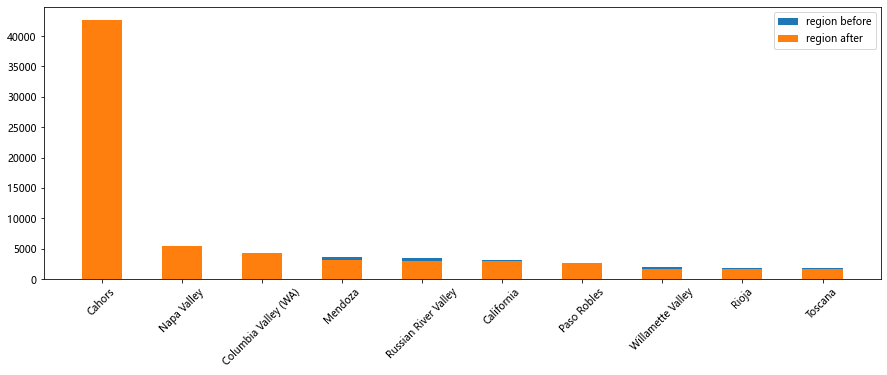

In [55]:
plt.figure(figsize=(15,5))
index = np.arange(10)
count = np.zeros(10)
plt.bar(index,d['region_1'][:],0.5,label='region before')
plt.xticks(index,d['region_1'].keys(),rotation=45)


plt.bar(index,c['region_1'][:],0.5,label='region after')
plt.xticks(index,c['region_1'].keys(),rotation=45)
plt.legend(loc='upper right')

**处理后仍有473个值无法填充**
**对比看到大量值被填充了cahors，而该值之前从未出现在前10中。一些排名也发生变化**

### 4.4 通过属性相关性填充缺失值

In [56]:
# 计算相关系数
print(cwine1_data.corr())

          points     price
points  1.000000  0.459869
price   0.459869  1.000000


**通过线性拟合用points与price的相关性填补price缺失值**

In [57]:
# 找出price空的point
pointx =  cwine1_data[cwine1_data.price.isnull()]['points']
test = cwine1_data.dropna(how='any',subset=['price'])
model = sm.OLS(test['price'],test['points']).fit()
price_pred = model.predict(pointx)

for i in price_pred.keys():
    cwine1_data.loc[i,'price'] = price_pred[i]
# for i in range(len(new_data)):
#     if(np.isnan(new_data['price'][i])):
#         new_data.loc[i,'price'] = model.predict(new_data['points'][i])
# number_data = ['points','price']


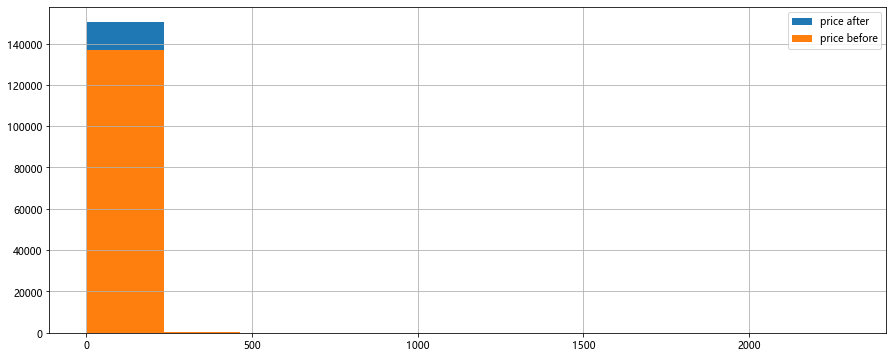

In [58]:
cwine1_data.price.hist(label='price after')
wine1_data.price.hist(label='price before')
plt.legend(loc='upper right')

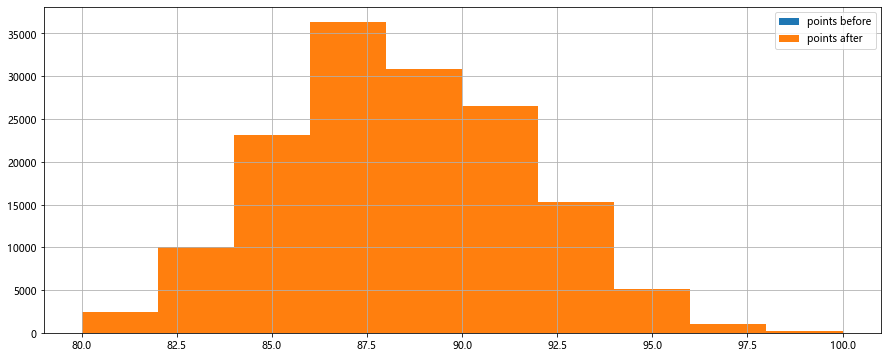

In [59]:
wine1_data.points.hist(label='points before')
cwine1_data.points.hist(label='points after')
plt.legend(loc='upper right')

AxesSubplot(0.125,0.125;0.775x0.755)


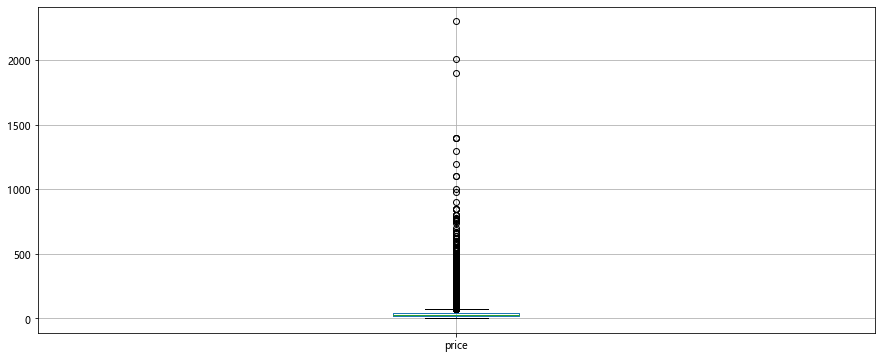

In [60]:
print(wine1_data.boxplot(column='price'))

AxesSubplot(0.125,0.125;0.775x0.755)


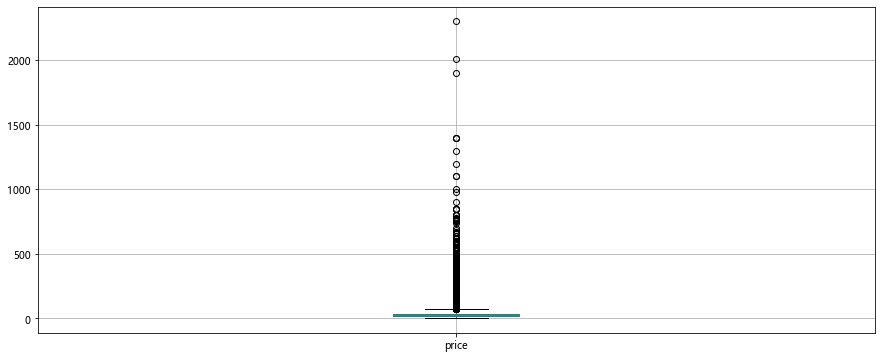

In [61]:
print(cwine1_data.boxplot(column='price'))

**处理后price较之前均值增加，大多数填充为最高频值**
**points无明显变化**

## 5. 可视化比较清洗前后数据集
- 首先删除country为空的行对齐前后数据集

In [62]:
wine1_data = wine1_data.dropna(how='any',subset=['country'])

In [63]:
wine1_data.shape,cwine1_data.shape

((150925, 10), (150925, 10))

In [64]:
# 对price做对比
price = wine1_data['price'].value_counts().head(350)
cprice = cwine1_data['price'].value_counts().head(350)
# len(price),len(cprice)
pltdf = pd.DataFrame({'price after':cprice.values,'price before':price.values})

<AxesSubplot:>

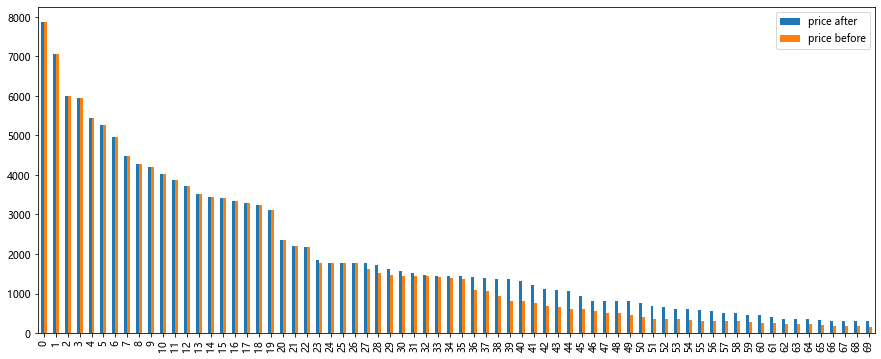

In [65]:
plt.rcParams['figure.figsize']=(15,6)
pltdf.sort_index().head(70).plot.bar()

**在频率较高的价格区间内前后变化不大，在频率较低的价格区间内有些值的出现次数增加明显**